# UCCD2063 ARTIFICIAL INTELLIGENCE TECHNIQUES

## Classification of Red Wine Quality using Neural Networks

**Group No**: 36

**Team members**:
1. Leong Khei Sheng, 1403785, CS
2. Wan Kar Hou, 1607221, CS
3. Leong Khai Siang, 1803387, CS

# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wine = pd.read_csv("./redwinequality.csv")

In [2]:
wine.head()

,WineID,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


As per observed from above, 'WineID' is not part of the features and must not included in the model. There are total of 11 features and 'Quality' is the output values.

The features for input matrix have different scales. Standardization on the features is needed to get standard deviation of 1.

In [3]:
wine.drop("WineID", axis =1 , inplace = True)

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
FixedAcidity          1599 non-null float64
VolatileAcidity       1599 non-null float64
CitricAcid            1599 non-null float64
ResidualSugar         1599 non-null float64
Chlorides             1599 non-null float64
FreeSulfurDioxide     1599 non-null float64
TotalSulfurDioxide    1599 non-null float64
Density               1599 non-null float64
PH                    1599 non-null float64
Sulphates             1599 non-null float64
Alcohol               1599 non-null float64
Quality               1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


No empty or null values found in this dataset

In [5]:
wine.describe()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine.corr()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
FixedAcidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
VolatileAcidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
CitricAcid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
ResidualSugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
FreeSulfurDioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
TotalSulfurDioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
PH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


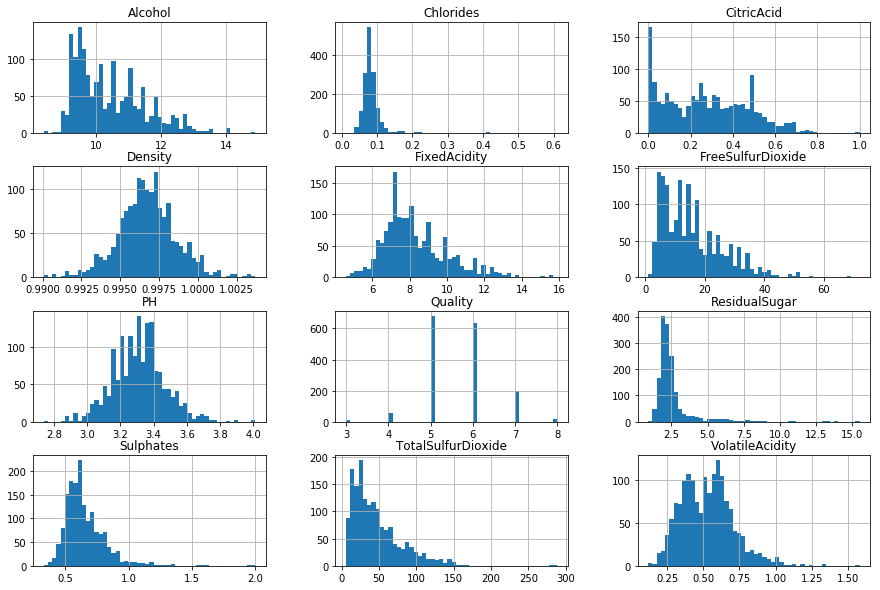

In [7]:
wine.hist(bins=50,figsize=(15,10))
plt.show()

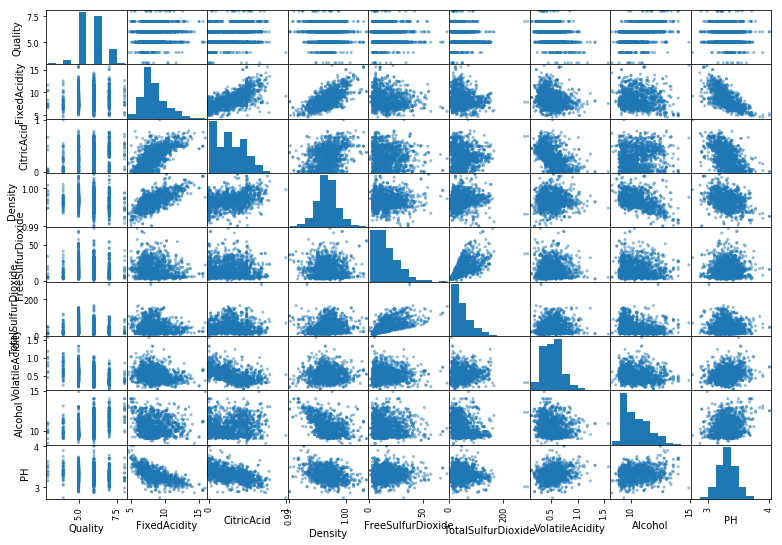

In [8]:
from pandas.plotting import scatter_matrix
selected_cols = ['Quality', 'FixedAcidity', 'CitricAcid', 'Density', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'VolatileAcidity', 'Alcohol', 'PH']

scatter_matrix(wine[selected_cols], figsize=(13, 9))
plt.show()

In [9]:
print(wine.Quality.value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: Quality, dtype: int64


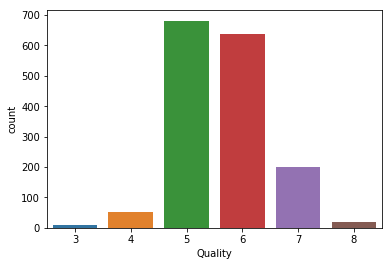

In [10]:
sns.countplot(x="Quality", data=wine)
plt.show()

The output values is skewed(right).

# Preprocessing

To obtained a more accurate data, the output value is divided into 2 categories which 3-5 are categorized as 0(Low Quality), and 1(High Quality)

In [11]:
wine['Quality'] = pd.cut(wine['Quality'], bins=2, labels=False)

In [12]:
X = wine.drop('Quality', axis = 1)
y = wine["Quality"]

In [13]:
y.value_counts()

1    855
0    744
Name: Quality, dtype: int64

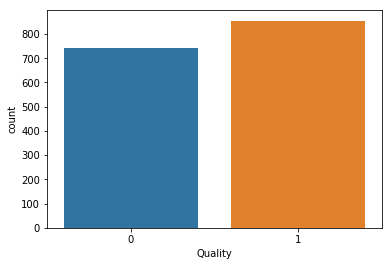

In [14]:
sns.countplot(y)

The output values are more balance after converted to 0 and 1

In [15]:
print ('X: shape=', X.shape)
print ('y: shape=', y.shape)

X: shape= (1599, 11)
y: shape= (1599,)


The datasets are splited into 80% training set and 20% test set.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('train shape=', X_train.shape)
print ('test shape=', X_test.shape)

train shape= (1279, 11)
test shape= (320, 11)


Standardization on the features needed to be performed as the features have different scales.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy = False)
scaler.fit(X_train)
X_train_tr = scaler.transform(X_train)
y_train = y_train.values

# Training

## Neural Networks

Create the model using MLPClassifier in Neural Network.

In [18]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_tr, y_train)
y_pred = mlp.predict(X_train_tr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [19]:
def peek_results(actual, predicted, num = 20):
    print('Actual | Predicted')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], '     |   ', predicted[sel])

peek_results(y_train, y_pred)

Actual | Predicted
------------------
1      |    1
1      |    1
1      |    1
0      |    0
0      |    1
1      |    1
1      |    1
1      |    1
1      |    1
1      |    1
0      |    0
1      |    1
0      |    1
1      |    1
1      |    1
1      |    1
0      |    0
1      |    1
1      |    1
0      |    0


# Validation

Import all the libraries that required later.

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Feature Selection (PCA)

Principal Component Analysis (PCA) is used to reduce the number of features of the data. Some output of the dataset is affected by only few main features, thus PCA is applied in this datasets to test whether reducing number of fetures will increase the accuracy of data.

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X_train_tr, y_train)
X_train_tr_pca = pca.transform(X_train_tr)

mlp.fit(X_train_tr_pca, y_train)
pca_pred = mlp.predict(X_train_tr_pca)
train_acc_pca = accuracy_score(y_train, pca_pred)
print('Training Accuracy with PCA = ', train_acc_pca)

Training Accuracy with PCA =  0.7498045347928068


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The training accuracy is around 75% after reducing to 3 features for the data.

### Accuracy

In [22]:
train_acc = accuracy_score(y_train, y_pred)

print("Training accuracy without PCA: {:.4f}".format(train_acc))

Training accuracy without PCA: 0.8139


The training accuracy without applying PCA is around 81%. Thus all features in this datasets are important and contribute much to the output values.

The model is fitted again with the original number of features. PCA doesn't help imporove the accuracy.

In [23]:
if train_acc > train_acc_pca:
    print('Best Training accuracy: Without PCA')
    mlp.fit(X_train_tr, y_train)
else:
    print('Best Training accuracy: With PCA')

Best Training accuracy: Without PCA


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Cross Validation

The training accuracy is measured with cross-validation to evaluate the model. 4-folds is set for this model.

In [24]:
kfold_result = cross_validate (mlp, X_train_tr, y_train, cv=4, scoring='accuracy', return_train_score=True)

print('Average training accuracy = {:.4f}'.format(kfold_result['train_score'].mean()))
print('Average validation accuracy = {:.4f}'.format(kfold_result['test_score'].mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average training accuracy = 0.8108
Average validation accuracy = 0.7577


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Confusion Matrix

In [25]:
y_pred_cv = cross_val_predict (mlp, X_train_tr, y_train, cv=4)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_train, y_pred_cv)
print(cm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[456 147]
 [163 513]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Precision, Recall, F1 Score

In [26]:
print(classification_report(y_train, y_pred_cv))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       603
           1       0.78      0.76      0.77       676

   micro avg       0.76      0.76      0.76      1279
   macro avg       0.76      0.76      0.76      1279
weighted avg       0.76      0.76      0.76      1279



In [27]:
print('Precision = {:.4f}'.format(precision_score(y_train, y_pred_cv)))
print('Recall = {:.4f}'.format(recall_score (y_train, y_pred_cv)))
print('F1 Score = {:.4f}'.format(f1_score(y_train, y_pred_cv)))

Precision = 0.7773
Recall = 0.7589
F1 Score = 0.7680


In [28]:
kfold_scores = cross_validate (mlp, X_train_tr, y_train, cv=4, scoring = ['precision', 'recall', 'f1'], return_train_score=False)

print('Average cross-validation recall = {:.4f}'.format(kfold_scores['test_recall'].mean()))
print('Average cross-validation precision = {:.4f}'.format(kfold_scores['test_precision'].mean()))
print('Average cross-validation f1 = {:.4f}'.format(kfold_scores['test_f1'].mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average cross-validation recall = 0.7589
Average cross-validation precision = 0.7775
Average cross-validation f1 = 0.7679


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Precision-Recall Graph

In [29]:
y_scores_cv = cross_val_predict (mlp, X_train_tr, y_train, cv=4)
precisions, recalls, thresholds = precision_recall_curve (y_train, y_scores_cv)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

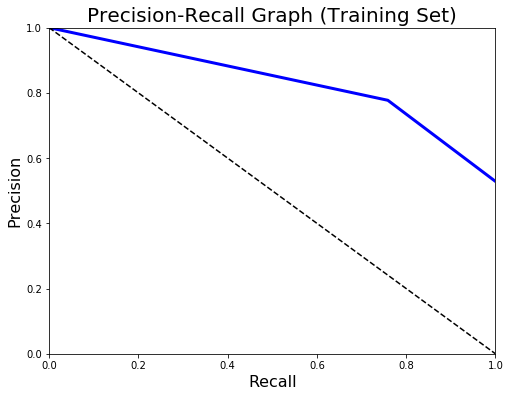

In [30]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 20)
plt.show()

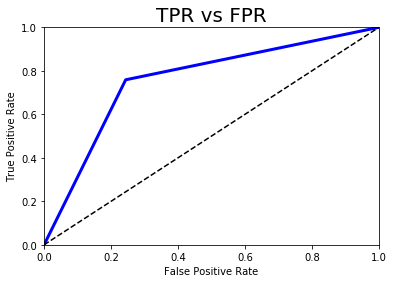

In [31]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=20)

plot_roc_curve(fpr, tpr)

In [32]:
auc = roc_auc_score(y_train, y_scores_cv)
print('AUC = {:.4f}'.format(auc))

AUC = 0.7575


## Fine Tune

### GridSearchCV

To get the best hyperparameters, GridSearchCV  is used.

In [33]:
import time
from sklearn.model_selection import GridSearchCV

start_time = time.time()
param = {'solver':['lbfgs'], 'max_iter':[500,1000,1500], 'alpha':10.0**-np.arange(1,10), 'hidden_layer_sizes':np.arange(10,15)}
grid_search = GridSearchCV(mlp, param, cv=4, scoring='accuracy')
print ('Performing grid search...', end = '')
grid_search.fit(X_train_tr, y_train)
print('Completed', end = '  ')
print('{:.2f}s'.format(time.time()-start_time))

Performing grid search...Completed  389.66s


In [34]:
best_model = grid_search.best_estimator_
best_model

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [35]:
print('Accuracy of the best model =', grid_search.best_score_)

Accuracy of the best model = 0.7505863956215794


# Testing

In [36]:
X_test_tr = scaler.transform(X_test)
y_test = y_test.values

Use the best model to predict test data.

In [37]:
y_pred_test = best_model.predict(X_test_tr)

print('Test data Accuracy= ', accuracy_score(y_test, y_pred_test))

Test data Accuracy=  0.778125


In [38]:
print('Test precision = {:.4f}'.format(precision_score(y_test, y_pred_test)))
print('Test recall = {:.4f}'.format(recall_score (y_test, y_pred_test)))
print('Test f1 score = {:.4f}'.format(f1_score(y_test, y_pred_test)))

Test precision = 0.8068
Test recall = 0.7933
Test f1 score = 0.8000


# Compare with Other Classifiers

## RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=10, random_state=42)
forest.fit(X_train_tr, y_train)
y_pred_forest = forest.predict(X_train_tr)

print('Accuracy = ', accuracy_score(y_train, y_pred_forest))

Accuracy =  0.9929632525410477


The model fitted very well on the training set with accuracy 99%.

In [40]:
print(classification_report(y_train, y_pred_forest))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       603
           1       1.00      0.99      0.99       676

   micro avg       0.99      0.99      0.99      1279
   macro avg       0.99      0.99      0.99      1279
weighted avg       0.99      0.99      0.99      1279



In [41]:
y_pred_test_forest = forest.predict(X_test_tr)

print('Test data Accuracy= ', accuracy_score(y_test, y_pred_test_forest))

Test data Accuracy=  0.778125


However, the model doesn't fitted so well on the test set. This may caused by the model is slightly overfitting.

In [42]:
kfold_result = cross_validate (forest, X_train_tr, y_train, cv=5, scoring='accuracy', return_train_score=True)
print('Average training accuracy = {:.4f}'.format(kfold_result['train_score'].mean()))
print('Average validation accuracy = {:.4f}'.format(kfold_result['test_score'].mean()))

Average training accuracy = 0.9893
Average validation accuracy = 0.7764


RandomForestClassifier seem like perform better than MLPClassifier. However, the model is slightly overfitting the datasets.

## SVClassifier

In [43]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_tr, y_train)
y_pred_svc = svc.predict(X_train_tr)

print('Accuracy = ', accuracy_score(y_train, y_pred))

Accuracy =  0.8139171227521501


In [44]:
print(classification_report(y_train, y_pred_svc))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       603
           1       0.82      0.80      0.81       676

   micro avg       0.80      0.80      0.80      1279
   macro avg       0.80      0.80      0.80      1279
weighted avg       0.80      0.80      0.80      1279



In [45]:
y_pred_test_svc = svc.predict(X_test_tr)

print('Accuracy = ', accuracy_score(y_test, y_pred_test_svc))

Accuracy =  0.771875


In [46]:
kfold_result = cross_validate (svc, X_train_tr, y_train, cv=5, scoring='accuracy', return_train_score=True)
print('Average training accuracy = {:.4f}'.format(kfold_result['train_score'].mean()))
print('Average validation accuracy = {:.4f}'.format(kfold_result['test_score'].mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Average training accuracy = 0.8030
Average validation accuracy = 0.7546


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The training accuracy of SVClassifier is quite same as MLPClassifier. MLPClassifier have slightly better performace during prediction of test data.